# Fig.2 - Evolution of MDR Types (w/ 5x3 subpanels)

Change plot's default size and font

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
rc = {"font.family" : "serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

You need to define these variables each run to reflect certain drug coverage settings.

In [2]:
setnum = 'IQR_data/set7'
plot_savepath = 'generated_figures/set7_fig2.svg'

Load Computed IQR Data

In [3]:
# Compute Median Value of NTF
from plot_helper import NTF_IQR_compute
MFT_ntf = NTF_IQR_compute('raw_data/set7_m/summary/set7m_%ssummary_0.txt')
Cyc_ntf = NTF_IQR_compute('raw_data/set7_c/summary/set7c_%ssummary_0.txt')
AC_ntf = NTF_IQR_compute('raw_data/set7_ac/summary/set7ac_%ssummary_0.txt')

In [4]:
import pandas as pd
MFT_L_IQRdf = pd.read_csv('%sm_L.csv' % setnum)
MFT_M_IQRdf = pd.read_csv('%sm_M.csv' % setnum)
MFT_U_IQRdf = pd.read_csv('%sm_U.csv' % setnum)

Cyc_L_IQRdf = pd.read_csv('%sc_L.csv' % setnum)
Cyc_M_IQRdf = pd.read_csv('%sc_M.csv' % setnum)
Cyc_U_IQRdf = pd.read_csv('%sc_U.csv' % setnum)

AdpCyc_L_IQRdf = pd.read_csv('%sac_L.csv' % setnum)
AdpCyc_M_IQRdf = pd.read_csv('%sac_M.csv' % setnum)
AdpCyc_U_IQRdf = pd.read_csv('%sac_U.csv' % setnum)

Test plot to get y-limit of each row (NO ANNOTATION)

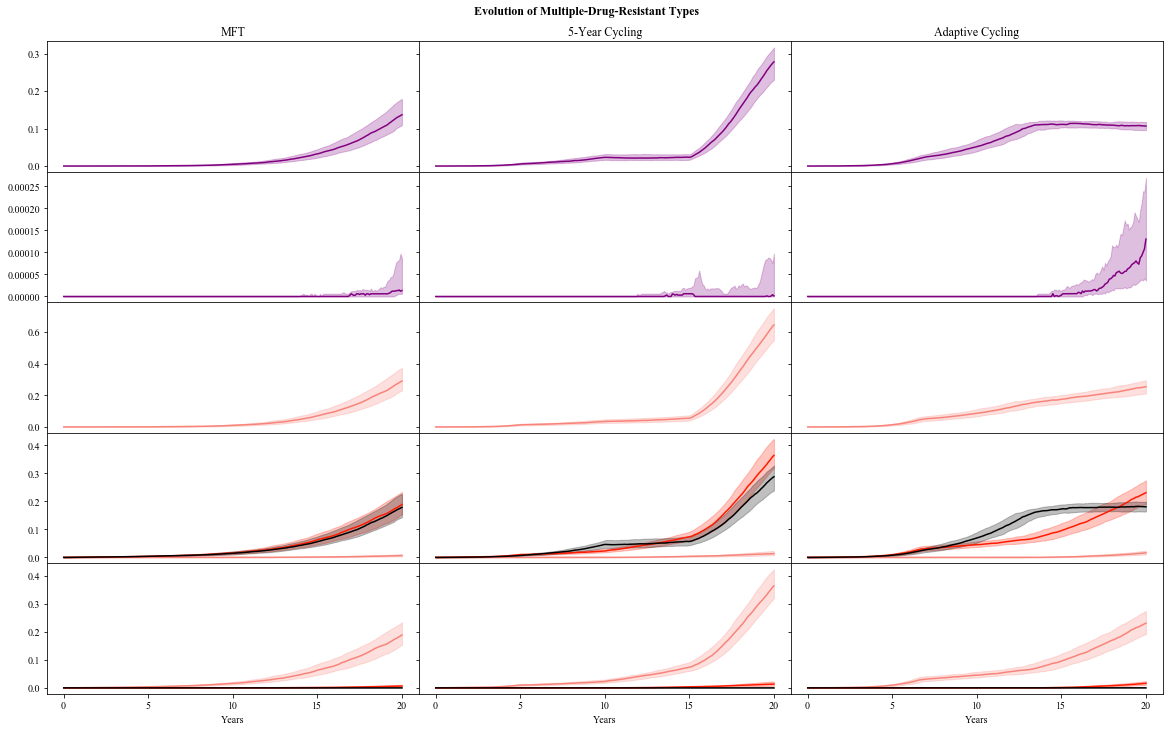

In [5]:
# prepare plt for 5x3 subpanels
from plot_helper import xaxis_label_ticker
import matplotlib.ticker as ticker
xlocator = 5*365
ticks_x = xaxis_label_ticker()

fig, axs = plt.subplots(5, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
fig.suptitle('Evolution of Multiple-Drug-Resistant Types', y=0.92, fontweight='bold')
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
      (ax10, ax11, ax12), (ax13, ax14, ax15) = axs

# plot trends for most-dangerous-triple (2 types)
from plotter import fig2_dangerous_triple, \
                    fig2_double_and_higher

#  MFT
fig2_dangerous_triple(ax1, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'TYY..Y2.')
fig2_dangerous_triple(ax4, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'KNF..Y2.')
fig2_double_and_higher(ax7, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'DHA-PPQ')
fig2_double_and_higher(ax10, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'ASAQ')
fig2_double_and_higher(ax13, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'AL')

#  Cycling
fig2_dangerous_triple(ax2, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'TYY..Y2.')
fig2_dangerous_triple(ax5, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'KNF..Y2.')
fig2_double_and_higher(ax8, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'DHA-PPQ')
fig2_double_and_higher(ax11, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'ASAQ')
fig2_double_and_higher(ax14, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'AL')

#  Adaptive Cycling
fig2_dangerous_triple(ax3, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'TYY..Y2.')
fig2_dangerous_triple(ax6, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'KNF..Y2.')
fig2_double_and_higher(ax9, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'DHA-PPQ')
fig2_double_and_higher(ax12, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'ASAQ')
fig2_double_and_higher(ax15, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'AL')

# Labeling Strategies
ax1.set_title('MFT')
ax2.set_title('5-Year Cycling')
ax3.set_title('Adaptive Cycling')

ax13.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax13.xaxis.set_major_formatter(ticks_x)
ax14.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax14.xaxis.set_major_formatter(ticks_x)
ax15.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax15.xaxis.set_major_formatter(ticks_x)

ax13.set_xlabel('Years')
ax14.set_xlabel('Years')
ax15.set_xlabel('Years')

(temp, row1ylim) = ax1.get_ylim()
(temp, row2ylim) = ax4.get_ylim()
(temp, row3ylim) = ax7.get_ylim()
(temp, row4ylim) = ax10.get_ylim()
(temp, row5ylim) = ax13.get_ylim()

Final Version of Plot

In [6]:
upper_row_lim = max(row1ylim, row2ylim)
lower_row_lim = max(row3ylim, row4ylim, row5ylim)
TITLE_FONTSIZE = 20
XLABEL_FONTSIZE = 18
lower_row_lowlim = 0 - lower_row_lim * 0.05

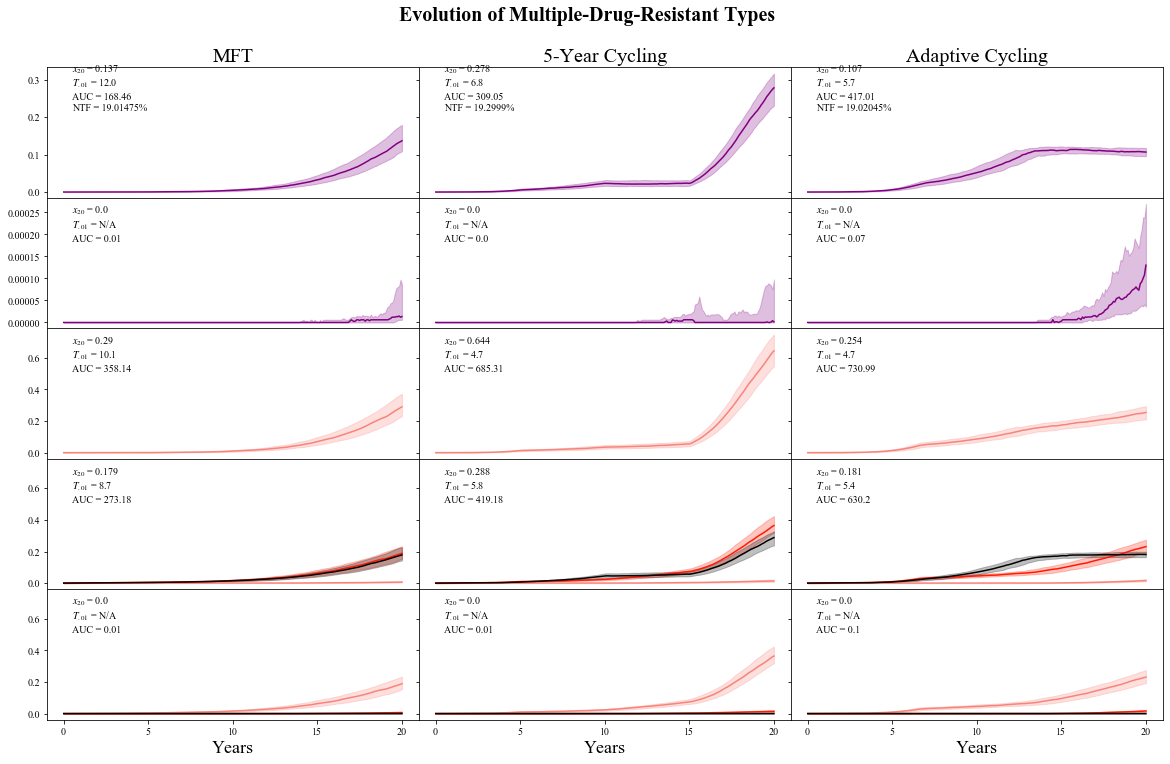

In [7]:
fig, axs = plt.subplots(5, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')

fig.suptitle('Evolution of Multiple-Drug-Resistant Types', y=0.95, fontweight='bold', fontsize=TITLE_FONTSIZE)
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
      (ax10, ax11, ax12), (ax13, ax14, ax15) = axs

ax7.set_ylim(lower_row_lowlim, lower_row_lim)
ax8.set_ylim(lower_row_lowlim, lower_row_lim)
ax9.set_ylim(lower_row_lowlim, lower_row_lim)
ax10.set_ylim(lower_row_lowlim, lower_row_lim)
ax11.set_ylim(lower_row_lowlim, lower_row_lim)
ax12.set_ylim(lower_row_lowlim, lower_row_lim)
ax13.set_ylim(lower_row_lowlim, lower_row_lim)
ax14.set_ylim(lower_row_lowlim, lower_row_lim)
ax15.set_ylim(lower_row_lowlim, lower_row_lim)

# plot trends for most-dangerous-triple (2 types combined)
from plotter import fig2_dangerous_triple, \
                    fig2_double_and_higher

#  MFT
fig2_dangerous_triple(ax1, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'TYY..Y2.', row1ylim, MFT_ntf)
fig2_dangerous_triple(ax4, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'KNF..Y2.', row2ylim)
fig2_double_and_higher(ax7, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'DHA-PPQ', lower_row_lim)
fig2_double_and_higher(ax10, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'ASAQ', lower_row_lim)
fig2_double_and_higher(ax13, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'AL', lower_row_lim)

#  Cycling
fig2_dangerous_triple(ax2, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'TYY..Y2.', row1ylim, Cyc_ntf)
fig2_dangerous_triple(ax5, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'KNF..Y2.', row2ylim)
fig2_double_and_higher(ax8, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'DHA-PPQ', lower_row_lim)
fig2_double_and_higher(ax11, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'ASAQ', lower_row_lim)
fig2_double_and_higher(ax14, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'AL', lower_row_lim)

#  Adaptive Cycling
fig2_dangerous_triple(ax3, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'TYY..Y2.', row1ylim, AC_ntf)
fig2_dangerous_triple(ax6, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'KNF..Y2.', row2ylim)
fig2_double_and_higher(ax9, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'DHA-PPQ', lower_row_lim)
fig2_double_and_higher(ax12, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'ASAQ', lower_row_lim)
fig2_double_and_higher(ax15, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'AL', lower_row_lim)

# Labeling Strategies
ax1.set_title('MFT', fontsize=TITLE_FONTSIZE)
ax2.set_title('5-Year Cycling', fontsize=TITLE_FONTSIZE)
ax3.set_title('Adaptive Cycling', fontsize=TITLE_FONTSIZE)

ax13.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax13.xaxis.set_major_formatter(ticks_x)
ax14.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax14.xaxis.set_major_formatter(ticks_x)
ax15.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax15.xaxis.set_major_formatter(ticks_x)

ax13.set_xlabel('Years', fontsize=XLABEL_FONTSIZE)
ax14.set_xlabel('Years', fontsize=XLABEL_FONTSIZE)
ax15.set_xlabel('Years', fontsize=XLABEL_FONTSIZE)

plt.savefig(fname=plot_savepath, format='svg')